In [1]:
%pylab inline
import imageio

Populating the interactive namespace from numpy and matplotlib


In [2]:
K = 5000  # Dinas / cm^3

def Distancia(x1, x2, y1, y2):
    # Sumamos los cuadrados y luego
    d = (x1 - x2) ** 2 + (y1 - y2)**2 
    # tomamos la raiz cuadrada
    d = d**0.5 
    return d

class Bolita():
    
    def __init__(self, x, y, Vx, Vy, m, r):
        self.x = x       # Posicion (cm)
        self.y = y       # Posicion (cm)
        self.Vx = Vx     # Velocidad (cm/s)
        self.Vy = Vy     # Velocidad (cm/s)
        self.m = m       # Masa (g)
        self.r = r       # Radio de la bolita (cm)
        self.Fx = 0      # Fuerza (dinas)
        self.Fy = 0      # Fuerza (dinas)

    def ReiniciaFuerzas(self):
        self.Fx = 0
        self.Fy = 0
        
    def CalculaFuerza(self, otraBolita):

        # Primero necesitamos las posiciones.
        x1 = self.x
        y1 = self.y     
        x2 = getattr(otraBolita, "x")
        y2 = getattr(otraBolita, "y")
        
        # Con esto calculamos la distancia.
        d = Distancia( x1, x2, y1, y2)
       
        # Ahora calculamos cuánto se ha comprimido esta bolita.
        R1 = self.r
        R2 = getattr(otraBolita, "r")
        
        # Cuando están en contacto ambas superficies, la distancia
        # entre el centro de una y el centro de la otra es igual a
        # la suma de los radios.
        #  R1 + R2 = d
        #        0 = d - R1 - R2
        Compresion = d - R1 - R2
        
        # Si este valor es negativo, están en contacto.
        if( Compresion < 0):
            # Calculamos la magnitud del vector Fuerza
            F = K * Compresion**3
            # Y ahora calculamos las componentes con el vector unitario que 
            #
            # d =  delta_x i + delta_y j
            #
            self.Fx += F * (x2 - x1) / d
            self.Fy += F * (y2 - y1) / d
            
            
    def Muevete(self, dt):
        # Integración de Euler
        # Cambia posición un dt * Velocidad
        self.x += dt * self.Vx
        self.y += dt * self.Vy
        
        # Acelera: Cambia velocidad según la fuerza aplicada.
        self.Vx += dt * self.Fx / self.m
        self.Vy += dt * self.Fy / self.m
        
    def Energia(self):
        ###################################### Calcular la energía de cada partícula!
        self.ener = 0.5 * self.m * (self.Vx**2 + self.Vy**2)
        return 0

In [35]:
##### Condiciones Iniciales ###################################

a = Bolita(-10.0,  3.0, 2.0, 0.0, 100, 2.5) # Está x=-10, y=0 y se dirige hacia b
b = Bolita(  0.0,  0.0, 0.0, 0.0, 200, 2.5) # Está en el origen, quieta.
c = Bolita( 0.0,  5.0, 0.0, 0.0,  20, 2.0) # Está quieta.


T  = []
Xa = []
Ya = []

Xb = []
Yb = []

Xc = []
Yc = []

E = [] ## Energía cinética del sistema.


#Momento del sistema
Px = []
Py = []

t = 0
deltaT = 5e-4      # DeltaT = 0.0005 segundos.

PrintStep = int(0.1 / deltaT) # Para tomar un snapshot cada 0.1 segundos

In [4]:
!mkdir trayectoria

mkdir: cannot create directory ‘trayectoria’: File exists


In [36]:
i = 0
j = 0

theta = np.linspace(0,2*np.pi,30)  # Parametro para graficar

filenames = []  # Guarda los nombres de los cuadros a grabar

while (t < 10):
    
    a.ReiniciaFuerzas()
    b.ReiniciaFuerzas()
    c.ReiniciaFuerzas()
 
    a.CalculaFuerza(b)
    b.CalculaFuerza(a)
    c.CalculaFuerza(a)
    
    a.Muevete(deltaT)
    b.Muevete(deltaT)
    c.Muevete(deltaT)
    
    a.Energia()
    b.Energia()
    c.Energia()
    

    
    if( PrintStep % 200 == 0): # Guarda cada 0.1 segundos.
        
        T.append( t)
        
        Xa.append( getattr(a, "x"))
        Ya.append( getattr(a, "y"))
        
        Xb.append( getattr(b, "x"))
        Yb.append( getattr(b, "y"))
        
        ##############################
        # An~adir posicion Xc y Yc
        Xc.append( getattr(c, "x"))
        Yc.append( getattr(c, "y"))
        #############################
        
        #############################
        # Calcular energia cinetica del sistema
        E.append(getattr(a, "ener") + getattr(b, "ener") + getattr(c, "ener"))
        #############################
        
        Px.append(getattr(a, "m")*getattr(a, "Vx") + getattr(b, "m")*getattr(b, "Vx") + getattr(c, "m")*getattr(c, "Vx"))
        Py.append(getattr(a, "m")*getattr(a, "Vy") + getattr(b, "m")*getattr(b, "Vy") + getattr(c, "m")*getattr(c, "Vy"))
        
        ############################# Graficar #############################################
        #
        fig=plt.figure()
        plt.axis("equal") # Proporción entre los ejes "igual"
        plt.ylim(-17,17)
        plt.xlim(-26,26)      
        
        plt.plot(Xa,Ya) # Trayectoria de A
        plt.plot(Xb,Yb) # Trayectoria de B
        plt.plot(Xc,Yc) # Trayectoria de C
        
        # Dibuja bolitas A y B
        plt.plot( Xa[-1] + getattr(a,"r") * cos(theta), Ya[-1] + getattr(a,"r") * sin(theta))
        plt.plot( Xb[-1] + getattr(b,"r") * cos(theta), Yb[-1] + getattr(b,"r") * sin(theta))
        plt.plot( Xc[-1] + getattr(c,"r") * cos(theta), Yc[-1] + getattr(c,"r") * sin(theta))
        plt.title('t = {} s'.format( round(t,3)))
        plt.xlabel("Coordenada X (cm)")
        plt.ylabel("Coordenada Y (cm)")
                
        # Guardar imágen.
        filename = "trayectoria/{}.png".format(i)
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
        i += 1
        #                 Fin de Graficar.
        #########################################################
    
    PrintStep += 1
    
    t += deltaT

In [32]:
with imageio.get_writer('trayectoria/movie.gif', mode='I') as writer:
    for filename in filenames:
        print(filename)
        image = imageio.imread(filename)
        writer.append_data(image)

trayectoria/0.png
trayectoria/1.png
trayectoria/2.png
trayectoria/3.png
trayectoria/4.png
trayectoria/5.png
trayectoria/6.png
trayectoria/7.png
trayectoria/8.png
trayectoria/9.png
trayectoria/10.png
trayectoria/11.png
trayectoria/12.png
trayectoria/13.png
trayectoria/14.png
trayectoria/15.png
trayectoria/16.png
trayectoria/17.png
trayectoria/18.png
trayectoria/19.png
trayectoria/20.png
trayectoria/21.png
trayectoria/22.png
trayectoria/23.png
trayectoria/24.png
trayectoria/25.png
trayectoria/26.png
trayectoria/27.png
trayectoria/28.png
trayectoria/29.png
trayectoria/30.png
trayectoria/31.png
trayectoria/32.png
trayectoria/33.png
trayectoria/34.png
trayectoria/35.png
trayectoria/36.png
trayectoria/37.png
trayectoria/38.png
trayectoria/39.png
trayectoria/40.png
trayectoria/41.png
trayectoria/42.png
trayectoria/43.png
trayectoria/44.png
trayectoria/45.png
trayectoria/46.png
trayectoria/47.png
trayectoria/48.png
trayectoria/49.png
trayectoria/50.png
trayectoria/51.png
trayectoria/52.png
tra

Text(0.5, 1.0, '$Energia$')

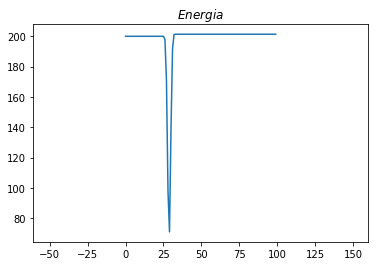

In [33]:
fig=plt.figure()
plt.axis("equal") # Proporción entre los ejes "igual"
plt.plot(E)
plt.title("$Energia$")

Text(0.5, 1.0, '$Momento$')

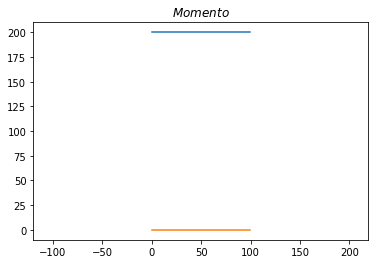

In [34]:
fig=plt.figure()
plt.axis("equal") # Proporción entre los ejes "igual"
plt.plot(Px)
plt.plot(Py)
plt.title("$Momento$")